In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('Mobile_App_Store_Data/appleStore.csv')
data2 = pd.read_csv('Mobile_App_Store_Data/appleStore_description.csv')

# merge data
data = pd.merge(data1, data2, how='outer', on=['id', 'id'])

# clean
data = data.drop('Unnamed: 0', axis=1)
data = data.drop('track_name_y', axis=1)
data = data.drop('size_bytes_y', axis=1)

# show
data.head(3)

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...


# QUESTION 1
Distribution of app prices (count of apps according to price plotted as histogram) 

Text(0, 0.5, 'frequency')

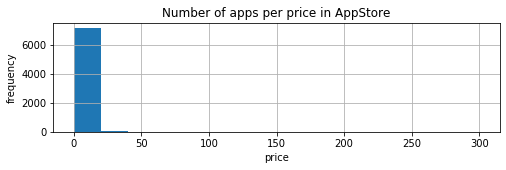

In [59]:
hist_plot = data['price'].hist(bins=15, figsize=(8,2))
hist_plot.set_title('Number of apps per price in AppStore')
hist_plot.set_xlabel('price')
hist_plot.set_ylabel('frequency')

conclusion: most of the apps available in AppStore is for free or for small amount of money.

# QUESTION 2
Depends Average User Rating Value on any other variable e.g. number of User Rating counts (all version)?  

In [93]:
def rating_count_group(rating):
    if rating < 10000:
        return 'below 10k'
    elif 10000 <= rating < 50000:
        return 'between 10k and 50k'
    elif 50000 <= rating <= 100000:
        return 'between 50k and 100k'
    else: 
        return'more than 100k'

data['rating_group'] = data.apply(lambda x: rating_count_group(x['rating_count_tot']),axis=1)
data

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,rating_group
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",between 10k and 50k
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,more than 100k
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,more than 100k
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,more than 100k
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,more than 100k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...,below 10k
7193,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...,below 10k
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A...",below 10k
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,VR Roller Coaster World is an app for Google C...,below 10k


In [94]:
data.groupby('rating_group').user_rating.describe()

,count,mean,std,min,25%,50%,75%,max
rating_group,,,,,,,,
below 10k,6181.0,3.401796,1.591411,0.0,3.0,4.0,4.5,5.0
between 10k and 50k,666.0,4.307057,0.464462,2.0,4.0,4.5,4.5,5.0
between 50k and 100k,132.0,4.227273,0.560683,2.0,4.0,4.5,4.5,5.0
more than 100k,218.0,4.268349,0.517222,2.0,4.0,4.5,4.5,5.0


In [95]:
av_rating_per_group = data.groupby('rating_group').user_rating.mean()

In [96]:
av_rating_per_group

rating_group
below 10k               3.401796
between 10k and 50k     4.307057
between 50k and 100k    4.227273
more than 100k          4.268349
Name: user_rating, dtype: float64

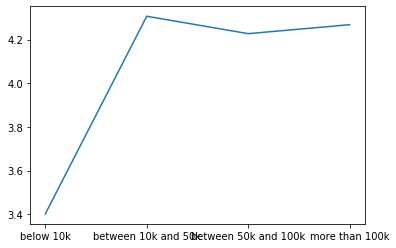

In [97]:
plt.plot(av_rating_per_group)

conclusion: Rating is the highest for the group between 10k and 50k reviews. The lowest for apps below 10k reviews.

# QUESTION 3
Number of apps for which current version rating is higher, the same or lower than for the previous versions

In [98]:
def rating_current_vs_all(current_rating, all_rating):
    if current_rating < all_rating:
        return 'lower'
    elif current_rating == all_rating:
        return 'the same'
    else:
        return 'higher'
    

  
data['rating_current_vs_all'] = data.apply(lambda x: rating_current_vs_all(x['user_rating_ver'], x['user_rating']),axis=1)
data

,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc,rating_group,rating_current_vs_all
0,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,"SAVE 20%, now only $3.99 for a limited time!\n...",between 10k and 50k,higher
1,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Let Evernote change the way you organize your ...,more than 100k,lower
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Download the most popular free weather app pow...,more than 100k,higher
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,The eBay app is the best way to find anything ...,more than 100k,higher
4,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,On more than 250 million devices around the wo...,more than 100k,higher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7192,1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1,Place the falling blocks correctly in order to...,below 10k,the same
7193,1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1,A thrilling virtual reality roller coaster exp...,below 10k,the same
7194,1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1,"Rock star Bret Michaels, winner of Celebrity A...",below 10k,lower
7195,1187838770,VR Roller Coaster World - Virtual Reality,97235968,USD,0.00,85,32,4.5,4.5,1.0.15,12+,Games,38,0,2,1,VR Roller Coaster World is an app for Google C...,below 10k,the same


Text(0, 0.5, 'frequency')

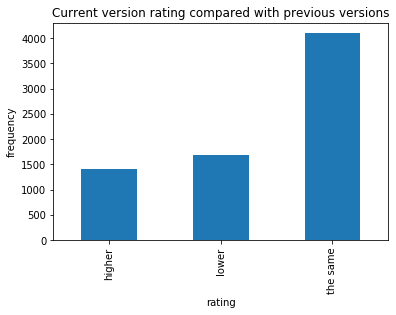

In [116]:
comparison_ratings = data.groupby('rating_current_vs_all')['id'].count()
bar_chart = comparison_ratings.plot.bar()
bar_chart.set_title('Current version rating compared with previous versions')
bar_chart.set_xlabel('rating')
bar_chart.set_ylabel('frequency')

conclusion: For majority of the apps, rating of the current version is the same as for the previous versions. A bit more apps get lower rating per current version than higher.